<a href="https://colab.research.google.com/github/smilieSushmitha/AV-V/blob/main/AV_V_Regression_parameter_tuned_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AV_V/all_and_classification.csv')  # load data set


data = data.drop('run', axis=1)
data['forks'] = data['forks'].replace(['steady state'], 1)
data['forks'] = data['forks'].replace(['no steady state'], 0)
data = data.loc[data['forks'] == 1]
data = data.drop('forks', axis=1)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,steady_state_starts,file_name
0,0.188482,0.075366,0.073728,0.072942,0.072614,0.075170,0.107217,0.087884,0.077857,0.076677,...,0.076481,0.076284,0.076349,0.076349,0.098763,0.076612,0.076153,0.076874,1765,eclipse__eclipse-collections#org.eclipse.colle...
1,0.188219,0.075891,0.073269,0.073335,0.073138,0.074449,0.104530,0.079888,0.071762,0.072090,...,0.073138,0.073204,0.073859,0.073204,0.073466,0.073269,0.073400,0.073597,480,eclipse__eclipse-collections#org.eclipse.colle...
2,0.190317,0.075170,0.072417,0.072221,0.073073,0.073531,0.113967,0.096076,0.088605,0.087949,...,0.076218,0.074908,0.074908,0.074842,0.073925,0.075497,0.073925,0.074514,421,eclipse__eclipse-collections#org.eclipse.colle...
3,0.190579,0.067994,0.073597,0.073400,0.073335,0.075235,0.106168,0.085983,0.078447,0.077464,...,0.074383,0.074973,0.074121,0.074842,0.083755,0.074646,0.074580,0.074711,1477,eclipse__eclipse-collections#org.eclipse.colle...
4,0.185860,0.074908,0.072155,0.072942,0.072810,0.074252,0.104530,0.095683,0.087753,0.085721,...,0.072745,0.076349,0.072745,0.072614,0.074056,0.072417,0.071959,0.073925,385,eclipse__eclipse-collections#org.eclipse.colle...


#Dividing data (train and test) based on file name 

In [4]:
data_file_name = data['file_name']
data_file_name

# data = data.drop('file_name', axis=1)


0       eclipse__eclipse-collections#org.eclipse.colle...
1       eclipse__eclipse-collections#org.eclipse.colle...
2       eclipse__eclipse-collections#org.eclipse.colle...
3       eclipse__eclipse-collections#org.eclipse.colle...
4       eclipse__eclipse-collections#org.eclipse.colle...
                              ...                        
5852    yellowstonegames__SquidLib#squidpony.performan...
5855    yellowstonegames__SquidLib#squidpony.performan...
5856    yellowstonegames__SquidLib#squidpony.performan...
5857    yellowstonegames__SquidLib#squidpony.performan...
5859    yellowstonegames__SquidLib#squidpony.performan...
Name: file_name, Length: 5219, dtype: object

In [5]:
data_file_name_unique = data_file_name.drop_duplicates(keep="first")

In [6]:
from sklearn.model_selection import train_test_split
data_file_name_train, data_file_name_test = train_test_split(data_file_name_unique, test_size=0.3,
                                                    random_state=1)

In [7]:
data_file_name_train 

4820    cantaloupe-project__cantaloupe#edu.illinois.li...
2240    RoaringBitmap__RoaringBitmap#org.roaringbitmap...
1021    raphw__byte-buddy#net.bytebuddy.benchmark.Supe...
520     jdbi__jdbi#org.jdbi.v3.benchmark.QualifiersBen...
3290    RoaringBitmap__RoaringBitmap#org.roaringbitmap...
                              ...                        
1290    cantaloupe-project__cantaloupe#edu.illinois.li...
1440    openzipkin__zipkin#zipkin2.internal.ReadBuffer...
720     openzipkin__zipkin#zipkin2.codec.ProtoCodecBen...
2350    yellowstonegames__SquidLib#squidpony.performan...
370     protostuff__protostuff#io.protostuff.benchmark...
Name: file_name, Length: 410, dtype: object

In [8]:
data_file_name_test

5120    apache__camel#org.apache.camel.itest.jmh.TypeC...
2250    zalando__logbook#org.zalando.logbook.HeaderBen...
230     zalando__logbook#org.zalando.logbook.HttpLogFo...
4510    protostuff__protostuff#io.protostuff.benchmark...
2420    jgrapht__jgrapht#org.jgrapht.perf.shortestpath...
                              ...                        
3640    eclipse__jetty.project#org.eclipse.jetty.util....
1570    cantaloupe-project__cantaloupe#edu.illinois.li...
160     netty__netty#io.netty.buffer.CompositeByteBufR...
5690    r2dbc__r2dbc-h2#io.r2dbc.h2.StagedResultSizeBe...
2180    netty__netty#io.netty.microbench.buffer.ByteBu...
Name: file_name, Length: 176, dtype: object

## Standardizing the data

In [9]:
data_without_file_name_and_y = data.drop('file_name', axis=1)
data_without_file_name_and_y = data_without_file_name_and_y.drop('steady_state_starts', axis=1)
sc = StandardScaler()
sc.fit(data_without_file_name_and_y.T)
data_std = pd.DataFrame(sc.transform(data_without_file_name_and_y.T))
data_std = data_std.T

In [10]:
data_std

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,15.729217,-0.446799,-0.681098,-0.793562,-0.840422,-0.474915,4.107977,1.343247,-0.090664,-0.259360,...,-0.437427,-0.362451,-0.287476,-0.315592,-0.306220,-0.306220,2.898993,-0.268732,-0.334336,-0.231244
1,14.768957,0.099609,-0.242733,-0.234175,-0.259850,-0.088679,3.839693,0.621680,-0.439580,-0.396787,...,-0.217058,-0.157148,-0.259850,-0.251292,-0.165706,-0.251292,-0.217058,-0.242733,-0.225616,-0.199940
2,15.188710,-0.112622,-0.478391,-0.504517,-0.391303,-0.330342,5.042978,2.665480,1.672679,1.585591,...,-0.931248,-1.027044,0.026719,-0.147457,-0.147457,-0.156166,-0.278089,-0.069078,-0.278089,-0.199710
3,17.012778,-1.129463,-0.300187,-0.329284,-0.338983,-0.057708,4.520286,1.532951,0.417550,0.272062,...,-0.135301,-0.183797,-0.183797,-0.096505,-0.222594,-0.115903,1.203180,-0.145001,-0.154700,-0.135301
4,16.410016,0.019216,-0.387407,-0.271229,-0.290592,-0.077599,4.395260,3.088255,1.916793,1.616666,...,-1.229699,-1.249062,-0.300274,0.232209,-0.300274,-0.319637,-0.106643,-0.348681,-0.416452,-0.126006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,3.136889,4.660223,-0.256262,0.023670,3.913239,5.662721,5.629702,5.735517,5.617517,9.586280,...,-0.304541,-0.287405,-0.299302,-0.122155,-0.275074,-0.277208,-0.276181,-0.275390,-0.278868,-0.225861
5215,1.874207,5.394570,6.439192,6.042358,6.282721,6.022390,5.812937,-0.251018,0.221640,1.063728,...,-0.206482,-0.147103,-0.271931,-0.269170,-0.260052,-0.257041,-0.261558,-0.209188,-0.197348,-0.209019
5216,3.137438,5.971989,-0.265681,-0.004903,4.313052,6.089951,6.076222,6.266721,6.106255,1.425192,...,1.058439,-0.349428,-0.313637,-0.315297,-0.318951,-0.315796,-0.195490,-0.215483,0.241000,4.485716
5217,1.904558,5.604098,6.647746,6.508702,6.354552,6.375264,5.634126,-0.244200,0.286686,0.940583,...,-0.254390,-0.279379,-0.287792,-0.238617,-0.311022,-0.097469,-0.274239,-0.276012,-0.174671,-0.277607


In [11]:
data_std = data_std.merge(data_file_name, left_index=True, right_index=True)
data_std = data_std.merge(data['steady_state_starts'], left_index=True, right_index=True)
data_std.head()

,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,file_name,steady_state_starts
0,15.729217,-0.446799,-0.681098,-0.793562,-0.840422,-0.474915,4.107977,1.343247,-0.090664,-0.259360,...,-0.287476,-0.315592,-0.306220,-0.306220,2.898993,-0.268732,-0.334336,-0.231244,eclipse__eclipse-collections#org.eclipse.colle...,1765
1,14.768957,0.099609,-0.242733,-0.234175,-0.259850,-0.088679,3.839693,0.621680,-0.439580,-0.396787,...,-0.259850,-0.251292,-0.165706,-0.251292,-0.217058,-0.242733,-0.225616,-0.199940,eclipse__eclipse-collections#org.eclipse.colle...,480
2,15.188710,-0.112622,-0.478391,-0.504517,-0.391303,-0.330342,5.042978,2.665480,1.672679,1.585591,...,0.026719,-0.147457,-0.147457,-0.156166,-0.278089,-0.069078,-0.278089,-0.199710,eclipse__eclipse-collections#org.eclipse.colle...,421
3,17.012778,-1.129463,-0.300187,-0.329284,-0.338983,-0.057708,4.520286,1.532951,0.417550,0.272062,...,-0.183797,-0.096505,-0.222594,-0.115903,1.203180,-0.145001,-0.154700,-0.135301,eclipse__eclipse-collections#org.eclipse.colle...,1477
4,16.410016,0.019216,-0.387407,-0.271229,-0.290592,-0.077599,4.395260,3.088255,1.916793,1.616666,...,-0.300274,0.232209,-0.300274,-0.319637,-0.106643,-0.348681,-0.416452,-0.126006,eclipse__eclipse-collections#org.eclipse.colle...,385


In [12]:
train_data = pd.merge(data_std, data_file_name_train, left_on='file_name', right_on='file_name')
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,file_name,steady_state_starts
0,19.850395,3.919269,1.088619,-0.649525,-0.757397,-1.104877,-0.836836,0.151414,0.906579,0.630874,...,-0.951656,-0.933434,-1.115561,-1.184451,-1.021878,-0.961322,-0.977089,-0.958776,JCTools__JCTools#org.jctools.channels.spsc.Sps...,2
1,2.562516,0.504552,0.342755,-0.072082,-0.006673,0.018932,-0.016947,-0.211087,-0.074588,0.022937,...,-0.147025,-0.215504,-0.149828,-0.150955,-0.100794,-0.152613,-0.152049,-0.159221,JCTools__JCTools#org.jctools.channels.spsc.Sps...,1
2,25.698245,5.467191,2.361931,1.014769,-0.242448,-0.836839,0.831208,0.740838,0.125529,0.816314,...,0.640598,1.926576,0.788552,0.677549,0.775965,0.707994,0.705428,0.791918,JCTools__JCTools#org.jctools.channels.spsc.Sps...,1344
3,1.958411,0.311209,0.068767,-0.073209,0.103914,0.044457,0.084911,0.125495,0.065075,-0.084904,...,0.074025,-0.080087,-0.084907,-0.082503,0.042396,0.037655,0.114309,0.041861,JCTools__JCTools#org.jctools.channels.spsc.Sps...,1
4,6.930946,8.373801,3.318279,2.115085,0.717736,0.498182,-0.791478,1.750784,3.681676,3.679147,...,-0.337158,-0.338733,-0.337777,-0.115834,-0.326962,-0.325566,-0.303728,-0.327647,JCTools__JCTools#org.jctools.channels.spsc.Sps...,1


In [13]:
test_data = pd.merge(data_std, data_file_name_test, left_on='file_name', right_on='file_name')
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,file_name,steady_state_starts
0,15.729217,-0.446799,-0.681098,-0.793562,-0.840422,-0.474915,4.107977,1.343247,-0.090664,-0.259360,...,-0.287476,-0.315592,-0.306220,-0.306220,2.898993,-0.268732,-0.334336,-0.231244,eclipse__eclipse-collections#org.eclipse.colle...,1765
1,14.768957,0.099609,-0.242733,-0.234175,-0.259850,-0.088679,3.839693,0.621680,-0.439580,-0.396787,...,-0.259850,-0.251292,-0.165706,-0.251292,-0.217058,-0.242733,-0.225616,-0.199940,eclipse__eclipse-collections#org.eclipse.colle...,480
2,15.188710,-0.112622,-0.478391,-0.504517,-0.391303,-0.330342,5.042978,2.665480,1.672679,1.585591,...,0.026719,-0.147457,-0.147457,-0.156166,-0.278089,-0.069078,-0.278089,-0.199710,eclipse__eclipse-collections#org.eclipse.colle...,421
3,17.012778,-1.129463,-0.300187,-0.329284,-0.338983,-0.057708,4.520286,1.532951,0.417550,0.272062,...,-0.183797,-0.096505,-0.222594,-0.115903,1.203180,-0.145001,-0.154700,-0.135301,eclipse__eclipse-collections#org.eclipse.colle...,1477
4,16.410016,0.019216,-0.387407,-0.271229,-0.290592,-0.077599,4.395260,3.088255,1.916793,1.616666,...,-0.300274,0.232209,-0.300274,-0.319637,-0.106643,-0.348681,-0.416452,-0.126006,eclipse__eclipse-collections#org.eclipse.colle...,385


In [14]:
train_data = train_data.drop('file_name', axis=1)
test_data = test_data.drop('file_name', axis=1)

In [15]:
X_train = train_data.drop('steady_state_starts', axis=1) 
y_train  = train_data['steady_state_starts']
X_test = test_data.drop('steady_state_starts', axis=1)
y_test = test_data['steady_state_starts']

In [16]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,19.850395,3.919269,1.088619,-0.649525,-0.757397,-1.104877,-0.836836,0.151414,0.906579,0.630874,...,-1.129076,-0.653716,-0.951656,-0.933434,-1.115561,-1.184451,-1.021878,-0.961322,-0.977089,-0.958776
1,2.562516,0.504552,0.342755,-0.072082,-0.006673,0.018932,-0.016947,-0.211087,-0.074588,0.022937,...,-0.153156,-0.145483,-0.147025,-0.215504,-0.149828,-0.150955,-0.100794,-0.152613,-0.152049,-0.159221
2,25.698245,5.467191,2.361931,1.014769,-0.242448,-0.836839,0.831208,0.740838,0.125529,0.816314,...,1.934241,0.912192,0.640598,1.926576,0.788552,0.677549,0.775965,0.707994,0.705428,0.791918
3,1.958411,0.311209,0.068767,-0.073209,0.103914,0.044457,0.084911,0.125495,0.065075,-0.084904,...,0.033093,0.039486,0.074025,-0.080087,-0.084907,-0.082503,0.042396,0.037655,0.114309,0.041861
4,6.930946,8.373801,3.318279,2.115085,0.717736,0.498182,-0.791478,1.750784,3.681676,3.679147,...,-0.335963,-0.336712,-0.337158,-0.338733,-0.337777,-0.115834,-0.326962,-0.325566,-0.303728,-0.327647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3.136889,4.660223,-0.256262,0.023670,3.913239,5.662721,5.629702,5.735517,5.617517,9.586280,...,-0.304541,-0.287405,-0.299302,-0.122155,-0.275074,-0.277208,-0.276181,-0.275390,-0.278868,-0.225861
3309,1.874207,5.394570,6.439192,6.042358,6.282721,6.022390,5.812937,-0.251018,0.221640,1.063728,...,-0.206482,-0.147103,-0.271931,-0.269170,-0.260052,-0.257041,-0.261558,-0.209188,-0.197348,-0.209019
3310,3.137438,5.971989,-0.265681,-0.004903,4.313052,6.089951,6.076222,6.266721,6.106255,1.425192,...,1.058439,-0.349428,-0.313637,-0.315297,-0.318951,-0.315796,-0.195490,-0.215483,0.241000,4.485716
3311,1.904558,5.604098,6.647746,6.508702,6.354552,6.375264,5.634126,-0.244200,0.286686,0.940583,...,-0.254390,-0.279379,-0.287792,-0.238617,-0.311022,-0.097469,-0.274239,-0.276012,-0.174671,-0.277607


In [17]:
y_train

0          2
1          1
2       1344
3          1
4          1
        ... 
3308      34
3309       3
3310       0
3311      43
3312       3
Name: steady_state_starts, Length: 3313, dtype: int64

In [18]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,15.729217,-0.446799,-0.681098,-0.793562,-0.840422,-0.474915,4.107977,1.343247,-0.090664,-0.259360,...,-0.437427,-0.362451,-0.287476,-0.315592,-0.306220,-0.306220,2.898993,-0.268732,-0.334336,-0.231244
1,14.768957,0.099609,-0.242733,-0.234175,-0.259850,-0.088679,3.839693,0.621680,-0.439580,-0.396787,...,-0.217058,-0.157148,-0.259850,-0.251292,-0.165706,-0.251292,-0.217058,-0.242733,-0.225616,-0.199940
2,15.188710,-0.112622,-0.478391,-0.504517,-0.391303,-0.330342,5.042978,2.665480,1.672679,1.585591,...,-0.931248,-1.027044,0.026719,-0.147457,-0.147457,-0.156166,-0.278089,-0.069078,-0.278089,-0.199710
3,17.012778,-1.129463,-0.300187,-0.329284,-0.338983,-0.057708,4.520286,1.532951,0.417550,0.272062,...,-0.135301,-0.183797,-0.183797,-0.096505,-0.222594,-0.115903,1.203180,-0.145001,-0.154700,-0.135301
4,16.410016,0.019216,-0.387407,-0.271229,-0.290592,-0.077599,4.395260,3.088255,1.916793,1.616666,...,-1.229699,-1.249062,-0.300274,0.232209,-0.300274,-0.319637,-0.106643,-0.348681,-0.416452,-0.126006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,6.646015,2.175950,2.976109,0.682660,1.710550,0.451408,0.264107,-0.098240,-0.116836,-0.101741,...,-0.129195,-0.114032,-0.121038,-0.120507,-0.131157,-0.129075,-0.129540,-0.133763,-0.123670,-0.121364
1338,5.013476,0.547533,2.417344,2.338879,2.334768,2.364399,2.357454,2.299245,2.350712,2.410073,...,-0.188026,-0.179000,-0.191830,-0.250155,-0.187138,-0.243065,-0.256042,-0.201937,-0.348957,5.649865
1339,3.968026,0.439111,1.868381,1.843385,1.824646,1.801049,1.793119,1.798880,1.806291,1.799633,...,-0.304525,-0.293686,-0.387285,-0.403954,-0.388946,-0.389759,-0.403468,-0.391349,-0.394913,-0.403236
1340,15.634223,2.942906,4.797148,4.684763,4.539094,4.691964,4.730527,4.725243,4.865671,4.833379,...,-0.177700,-0.042306,-0.147614,-0.244292,-0.228255,-0.231545,-0.247713,0.328117,-0.182624,-0.202054


In [19]:
y_test

0       1765
1        480
2        421
3       1477
4        385
        ... 
1337     147
1338    1883
1339     218
1340    2169
1341     425
Name: steady_state_starts, Length: 1342, dtype: int64

In [20]:
# x_data = data.drop('steady_state_starts', axis=1)
# y_data = data['steady_state_starts']

# x_data = data_std.drop(3000, axis=1)
# y_data = data_std[3000]

 # Accurracy measure
 **Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the predicted and actual values. It calculates the average of the absolute differences between each prediction and its corresponding target value. ***Lower MAE values indicate better accuracy***.

**Mean Squared Error (MSE)**: MSE is similar to MAE but squares the differences between predictions and actual values before taking the average. Squaring the errors gives more weight to larger errors. MSE is useful for penalizing outliers more heavily and is widely used. ***Lower MSE values indicate better accuracy***.

**Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE. It provides an interpretable metric in the same units as the target variable and is easier to relate to the original scale of the problem.

**R-squared (R2)** Score: R2 score measures the proportion of the variance in the target variable that is predictable from the features used in the regression model. It ranges from 0 to 1, with ***1 indicating a perfect fit***. Higher R2 scores indicate better accuracy.

Meaning of negative R2 explained -https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative#:~:text=Here's%20an%20explanation%20for%20those,target%20values%20(%CB%89y).

#  Lasso Regression

In [21]:
from sklearn import linear_model

In [22]:
lassoReg = linear_model.Lasso(alpha=73.0)
lassoReg.fit(X_train, y_train)
y_pred_lasso_reg = lassoReg.predict(X_test)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso_reg)
lasso_mse = mean_squared_error(y_test, y_pred_lasso_reg)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso_reg, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso_reg)

print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print("R2 Score:", lasso_r2)

MAE: 483.6592622295844
MSE: 449339.9959820048
RMSE: 670.3282747893041
R2 Score: -0.004340872297561527


# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10000000000000000000)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2)

MAE: 483.9917992301475
MSE: 447452.1291093759
RMSE: 668.9186266724645
R2 Score: -0.00012121262205444516


#Softmax Regression

In [25]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X_train, y_train)
y_pred_sofmax = softmax_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
softmax_mae = mean_absolute_error(y_test, y_pred_sofmax)
softmax_mse = mean_squared_error(y_test, y_pred_sofmax)
softmax_rmse = mean_squared_error(y_test, y_pred_sofmax, squared=False)
softmax_r2 = r2_score(y_test, y_pred_sofmax)

print("MAE:", softmax_mae)
print("MSE:", softmax_mse)
print("RMSE:", softmax_rmse)
print("R2 Score:", softmax_r2)

MAE: 465.15201192250373
MSE: 721729.5871833084
RMSE: 849.5466951164653
R2 Score: -0.6131716064369048


# Decision Tree Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtregr = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=90, min_samples_leaf=6,
                      min_weight_fraction_leaf=0.2, splitter='random')
dtregr.fit(X_train, y_train)
y_pred_dtr = dtregr.predict(X_test)

dt_mae = mean_absolute_error(y_test, y_pred_dtr)
dt_mse = mean_squared_error(y_test, y_pred_dtr)
dt_rmse = mean_squared_error(y_test, y_pred_dtr, squared=False)
dt_r2 = r2_score(y_test, y_pred_dtr)

print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R2 Score:", dt_r2)


MAE: 485.60540732124747
MSE: 449696.7911403896
RMSE: 670.5943566273054
R2 Score: -0.005138361868505692


# Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

rfr_mae = mean_absolute_error(y_test, y_pred_rfr)
rfr_mse = mean_squared_error(y_test, y_pred_rfr)
rfr_rmse = mean_squared_error(y_test, y_pred_rfr, squared=False)
rfr_r2 = r2_score(y_test, y_pred_rfr)

print("MAE:", rfr_mae)
print("MSE:", rfr_mse)
print("RMSE:", rfr_rmse)
print("R2 Score:", rfr_r2)

MAE: 476.2169550537887
MSE: 446075.4095388482
RMSE: 667.8887703344384
R2 Score: 0.002955957776167306


# KNN Model

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=56, weights='distance', algorithm='auto')
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

knr_mae = mean_absolute_error(y_test, y_pred_knr)
knr_mse = mean_squared_error(y_test, y_pred_knr)
knr_rmse = mean_squared_error(y_test, y_pred_knr, squared=False)
knr_r2 = r2_score(y_test, y_pred_knr)

print("MAE:", knr_mae)
print("MSE:", knr_mse)
print("RMSE:", knr_rmse)
print("R2 Score:", knr_r2)



MAE: 487.93296685779137
MSE: 458320.6433736379
RMSE: 676.9938281651007
R2 Score: -0.02441393793997726


# Gausian Regression

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, alpha=10000, random_state=0)
gpr.fit(X_train, y_train)
y_pred_gpr = gpr.predict(X_test)
gpr.score(X_train, y_train)

gpr_mae = mean_absolute_error(y_test, y_pred_gpr)
gpr_mse = mean_squared_error(y_test, y_pred_gpr)
gpr_rmse = mean_squared_error(y_test, y_pred_gpr, squared=False)
gpr_r2 = r2_score(y_test, y_pred_gpr)

print("MAE:", gpr_mae)
print("MSE:", gpr_mse)
print("RMSE:", gpr_rmse)
print("R2 Score:", gpr_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


MAE: 483.87249533449796
MSE: 449353.50953299756
RMSE: 670.3383545143435
R2 Score: -0.004371077068366036


# Neural Network Regression

In [32]:
from sklearn.neural_network import MLPRegressor
#%%
nnRegr = MLPRegressor(random_state=1, max_iter=500, activation='tanh', solver='sgd')
nnRegr.fit(X_train, y_train)
y_pred_nnRegr = nnRegr.predict(X_test)

nn_mae = mean_absolute_error(y_test, y_pred_nnRegr)
nn_mse = mean_squared_error(y_test, y_pred_nnRegr)
nn_rmse = mean_squared_error(y_test, y_pred_nnRegr, squared=False)
nn_r2 = r2_score(y_test, y_pred_nnRegr)

print("MAE:", nn_mae)
print("MSE:", nn_mse)
print("RMSE:", nn_rmse)
print("R2 Score:", nn_r2)

MAE: 502.904862453423
MSE: 482814.3587170071
RMSE: 694.8484429837971
R2 Score: -0.07916098840007657


#CNN

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

In [34]:
model = Sequential()
model.add(Conv1D(32, 2, activation="hard_sigmoid", input_shape=(3000, 1)))
model.add(Flatten())
model.add(Dense(64, activation="hard_sigmoid"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2999, 32)          96        
                                                                 
 flatten (Flatten)           (None, 95968)             0         
                                                                 
 dense (Dense)               (None, 64)                6142016   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,142,177
Trainable params: 6,142,177
Non-trainable params: 0
_________________________________________________________________


In [35]:
xtrain = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
xtest = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [36]:
model.fit(xtrain, y_train, batch_size=12,epochs=20, verbose=0)
y_pred_cnn = model.predict(xtest)


42/42 [==============================] - 1s 27ms/step


In [37]:
cnn_mae = mean_absolute_error(y_test, y_pred_cnn)
cnn_mse = mean_squared_error(y_test, y_pred_cnn)
cnn_rmse = mean_squared_error(y_test, y_pred_cnn, squared=False)
cnn_r2 = r2_score(y_test, y_pred_cnn)

print("MAE:", cnn_mae)
print("MSE:", cnn_mse)
print("RMSE:", cnn_rmse)
print("R2 Score:", cnn_r2)

MAE: 395.36302532986275
MSE: 495545.19180090417
RMSE: 703.9497082895227
R2 Score: -0.10761626974357807


#Results

In [38]:
lst = [
       [lasso_mae, lasso_mse, lasso_rmse, lasso_r2],
       [ridge_mae, ridge_mse, ridge_rmse, ridge_r2],
       [softmax_mae, softmax_mse, softmax_rmse, softmax_r2],
       [dt_mae, dt_mse, dt_rmse, dt_r2],
       [rfr_mae, rfr_mse, rfr_rmse, rfr_r2],
       [knr_mae, knr_mse, knr_rmse, knr_r2],
       [gpr_mae, gpr_mse, gpr_rmse, gpr_r2],
       [nn_mae, nn_mse, nn_rmse, nn_r2],
       [cnn_mae, cnn_mse, cnn_rmse, cnn_r2]]
result = pd.DataFrame(lst, index =[ 'lasso', 'ridge', 'softmax', 'decision_tree', 'random_forest', 'k_nearest_neighbor', 'gausian', 'neural_network', 'cnn'],
                                              columns =['MAE', 'MSE', 'RMSE','R2 Score'])

In [39]:
result

,MAE,MSE,RMSE,R2 Score
lasso,483.659262,449339.995982,670.328275,-0.004341
ridge,483.991799,447452.129109,668.918627,-0.000121
softmax,465.152012,721729.587183,849.546695,-0.613172
decision_tree,485.605407,449696.791140,670.594357,-0.005138
random_forest,476.216955,446075.409539,667.888770,0.002956
k_nearest_neighbor,487.932967,458320.643374,676.993828,-0.024414
gausian,483.872495,449353.509533,670.338355,-0.004371
neural_network,502.904862,482814.358717,694.848443,-0.079161
cnn,395.363025,495545.191801,703.949708,-0.107616


In [40]:
x_axis = result.index.values.tolist()

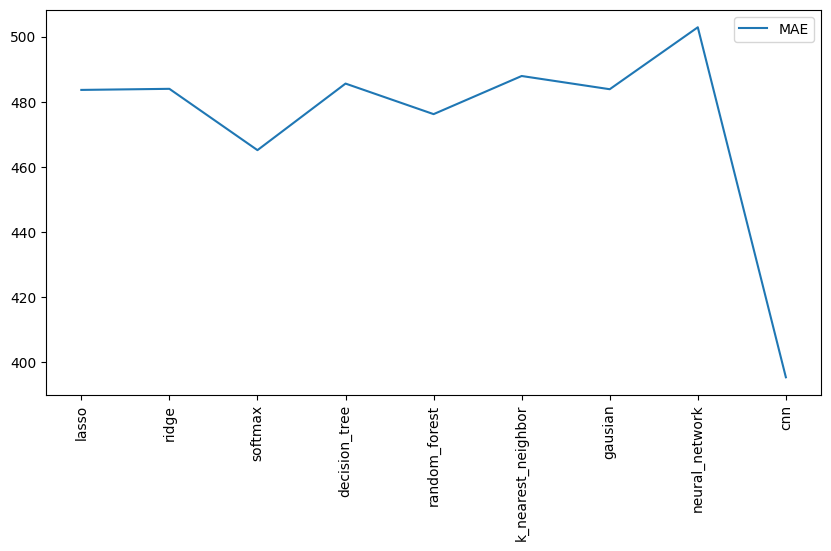

In [41]:
import matplotlib.pyplot as mp
result.plot( y='MAE',
        kind="line", figsize=(10, 5))
mp.xticks(range(9), x_axis, rotation=90)
mp.show()

In [42]:
print(result['MAE'].idxmin())
print(result['MSE'].idxmin())
print(result['RMSE'].idxmin())
print(result['R2 Score'].idxmin())

cnn
random_forest
random_forest
softmax
